In [180]:
%load_ext autoreload
%autoreload 2
from src.util import utilities as util
from src.data import image_processor as ip

import cv2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


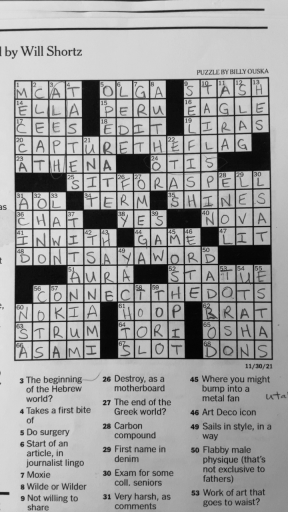

In [181]:
image = ip.load_image("../data/raw/image_uploads/2021-11-30-2d4a364a-9008-4c2d-8889-e28544fe7315.png")
util.showarray(image, scale_factor=.4)

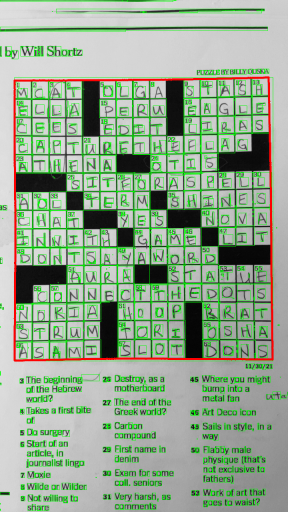

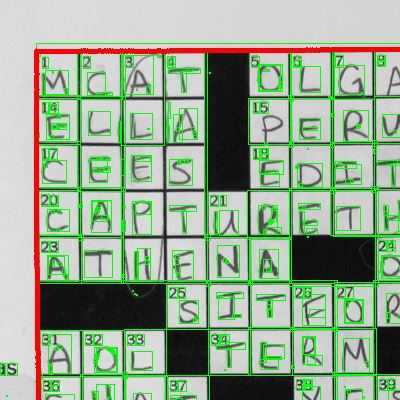

In [182]:
# let's identify the grid and crop it out

max_contour,image_contours = ip.__find_grid(image)

util.showarray(image_contours, scale_factor=.4)
util.showarray(image_contours, crop=(0,150,400,400))

In [183]:
# find the corners of our crossword grid
corners = ip.__find_corners(max_contour)
print(corners)

[[ 36 200]
 [ 36 901]
 [681 899]
 [672 193]]


In [184]:
# find the max width/height
dimensions = ip.__calculate_dimensions(corners)

print(dimensions)

(645, 706)


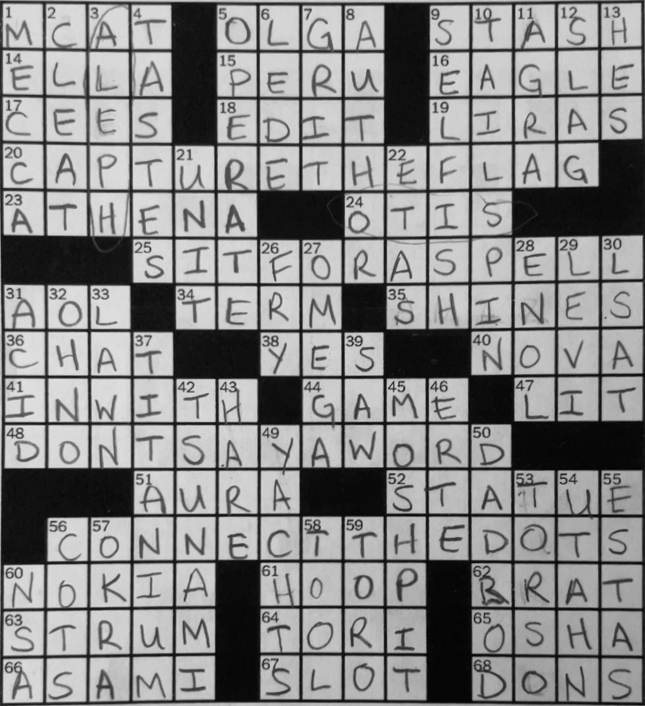

In [208]:
warped_cropped = ip.crop_grid(image)

util.showarray(warped_cropped)

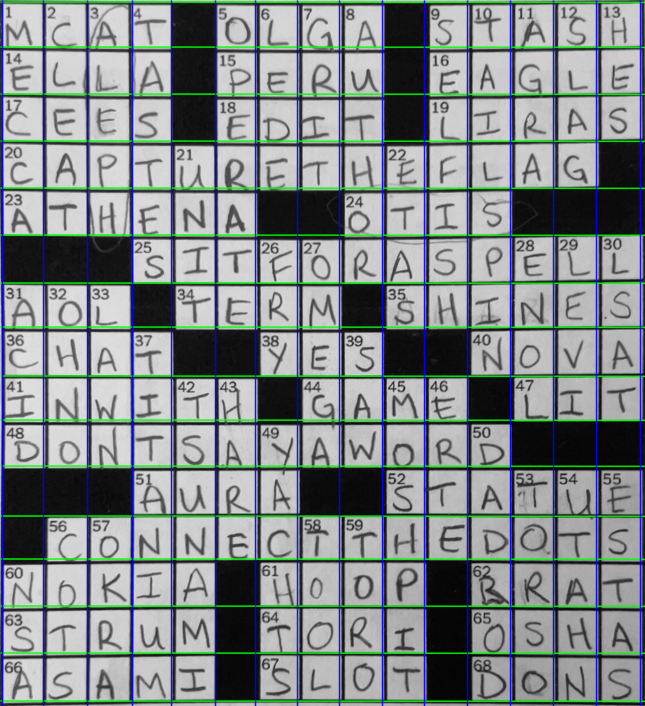

In [243]:
hlines,vlines,image_grid_lines = ip.__find_grid_lines(warped_cropped)

util.showarray(image_grid_lines,scale_factor=1)
#util.showarray(image_grid_lines,crop=(0,0,400,400), scale_factor=2)

y: 1, yheight: 46, x: 2, xwidth:43, height: 706, width: 645
y: 1, yheight: 46, x: 43, xwidth:87, height: 706, width: 645
y: 1, yheight: 46, x: 87, xwidth:132, height: 706, width: 645
y: 1, yheight: 46, x: 132, xwidth:171, height: 706, width: 645
y: 1, yheight: 46, x: 171, xwidth:215, height: 706, width: 645
y: 1, yheight: 46, x: 215, xwidth:255, height: 706, width: 645
y: 1, yheight: 46, x: 255, xwidth:297, height: 706, width: 645
y: 1, yheight: 46, x: 297, xwidth:339, height: 706, width: 645
y: 1, yheight: 46, x: 339, xwidth:382, height: 706, width: 645
y: 1, yheight: 46, x: 382, xwidth:424, height: 706, width: 645
y: 1, yheight: 46, x: 424, xwidth:467, height: 706, width: 645
y: 1, yheight: 46, x: 467, xwidth:510, height: 706, width: 645
y: 1, yheight: 46, x: 510, xwidth:553, height: 706, width: 645
y: 1, yheight: 46, x: 553, xwidth:596, height: 706, width: 645
y: 1, yheight: 46, x: 596, xwidth:640, height: 706, width: 645
y: 46, yheight: 93, x: 640, xwidth:43, height: 706, width: 64

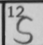

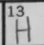

In [249]:
# Crop the cells
hlines,vlines,_ = ip.__find_grid_lines(warped_cropped)
    
cropped_cells = ip.__crop_cells(hlines,vlines,warped_cropped)

for cell in cropped_cells[13:15]:
    util.showarray(cell)